<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.214716  89.097401  45.022614  0.000088  187.334818   
      1.0    23.583159  57.657239  25.031872  0.000133  116.272403   
      2.0    95.903262  77.582717  76.887929 -0.000097  260.373811   
      3.0    39.347241  98.434866  34.787201 -0.000058  182.569250   
      4.0    39.020170  74.975299  84.620550  0.000131  208.616150   
...                ...        ...        ...       ...         ...   
999.0 15.0   73.929733  71.524697  95.979605  0.000043  251.434078   
      16.0   57.644976  62.694131  94.351564 -0.000349  224.690322   
      17.0   53.118121  75.325633  33.474803 -0.000165  171.918391   
      18.0   87.972854  32.866994  44.971649 -0.000143  175.811355   
      19.0   63.744100  45.889395  59.039034 -0.000322  178.672207   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    187.334819 -6.649113e-07  
      1.0    116.272383  1.980854e-05  
      2.0    260.373875 -6.467227e-05  
      3.0    182.569441 -1.909155e-04  
      4.0    208.615967  1.826618e-04  
...                 ...           ...  
999.0 15.0   251.434345 -2.675213e-04  
      16.0   224.691014 -6.926051e-04  
      17.0   171.918038  3.536220e-04  
      18.0   175.811842 -4.874309e-04  
      19.0   178.672743 -5.356294e-04  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.214716  89.097401  45.022614  0.000088  187.334818   
      1.0    23.583159  57.657239  25.031872  0.000133  116.272403   
      2.0    95.903262  77.582717  76.887929 -0.000097  260.373811   
      3.0    39.347241  98.434866  34.787201 -0.000058  182.569250   
      4.0    39.020170  74.975299  84.620550  0.000131  208.616150   
...                ...        ...        ...       ...         ...   
999.0 15.0   73.929733  71.524697  95.979605  0.000043  251.434078   
      16.0   57.644976  62.694131  94.351564 -0.000349  224.690322   
      17.0   53.118121  75.325633  33.474803 -0.000165  171.918391   
      18.0   87.972854  32.866994  44.971649 -0.000143  175.811355   
      19.0   63.744100  45.889395  59.039034 -0.000322  178.672207   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    187.334819 -6.649113e-07  
      1.0    116.272383  1.980854e-05  
      2.0    260.373875 -6.467227e-05  
      3.0    182.569441 -1.909155e-04  
      4.0    208.615967  1.826618e-04  
...                 ...           ...  
999.0 15.0   251.434345 -2.675213e-04  
      16.0   224.691014 -6.926051e-04  
      17.0   171.918038  3.536220e-04  
      18.0   175.811842 -4.874309e-04  
      19.0   178.672743 -5.356294e-04  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.214716  89.097401  45.022614  0.000088  187.334818   
      1.0    23.583159  57.657239  25.031872  0.000133  116.272403   
      2.0    95.903262  77.582717  76.887929 -0.000097  260.373811   
      3.0    39.347241  98.434866  34.787201 -0.000058  182.569250   
      4.0    39.020170  74.975299  84.620550  0.000131  208.616150   
...                ...        ...        ...       ...         ...   
999.0 15.0   73.929733  71.524697  95.979605  0.000043  251.434078   
      16.0   57.644976  62.694131  94.351564 -0.000349  224.690322   
      17.0   53.118121  75.325633  33.474803 -0.000165  171.918391   
      18.0   87.972854  32.866994  44.971649 -0.000143  175.811355   
      19.0   63.744100  45.889395  59.039034 -0.000322  178.672207   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    187.334819 -6.649113e-07  
      1.0    116.272383  1.980854e-05  
      2.0    260.373875 -6.467227e-05  
      3.0    182.569441 -1.909155e-04  
      4.0    208.615967  1.826618e-04  
...                 ...           ...  
999.0 15.0   251.434345 -2.675213e-04  
      16.0   224.691014 -6.926051e-04  
      17.0   171.918038  3.536220e-04  
      18.0   175.811842 -4.874309e-04  
      19.0   178.672743 -5.356294e-04  

[20000 rows x 7 columns]

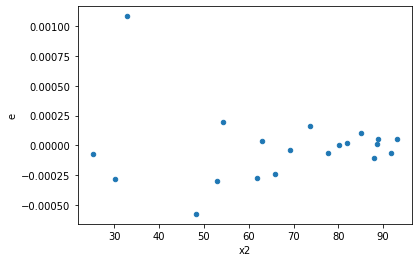

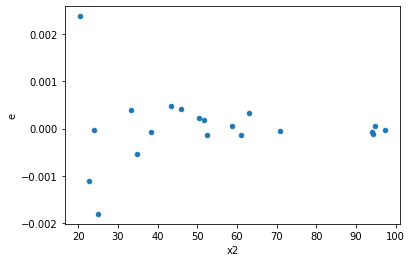

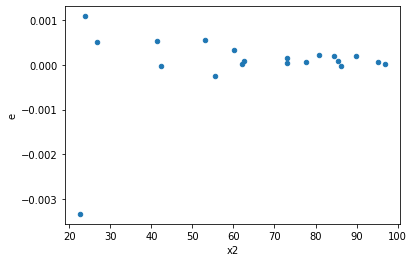

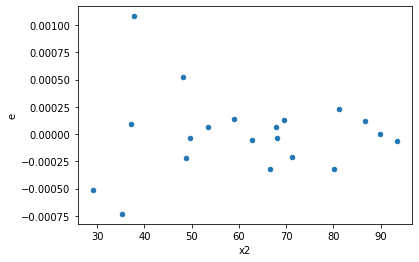

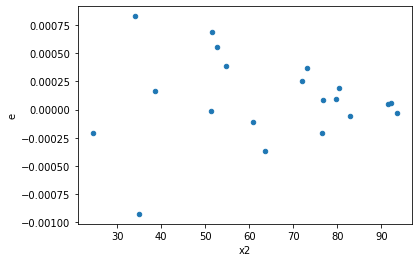

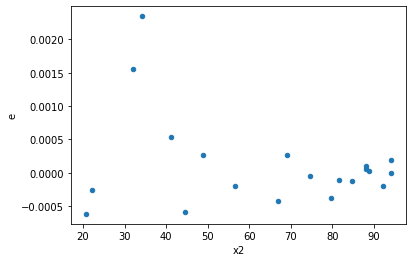

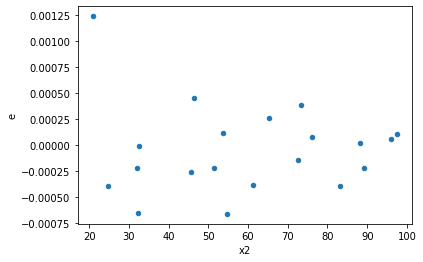

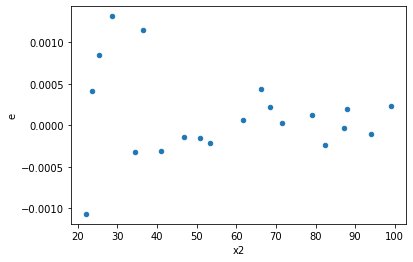

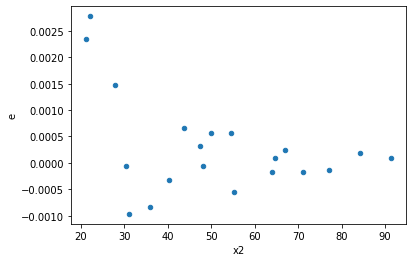

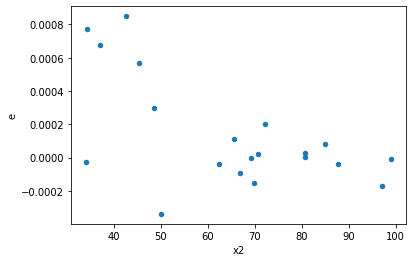

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,5.0,5.0,7.793547969510114e-08,1.873569528248687e-07,1.558709593902023e-08,3.747139056497374e-08,2.4040007652207414,0.3578001920018081,0.8210999039990959,0.17890009600090406,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,8.302494315309183e-07,2.1110921968830603e-06,1.6604988630618366e-07,4.2221843937661206e-07,2.542720436423983,0.32878741590962446,0.8356062920451878,0.16439370795481223,Reject005=1 : Homoscedasticity
25.0,5.0,5.0,1.7255497406993208e-07,1.1159187736359053e-06,3.4510994813986415e-08,2.2318375472718107e-07,6.467033359372488,0.061350568500833536,0.9693247157495832,0.030675284250416768,Reject005=1 : Homoscedasticity
38.0,5.0,5.0,1.620587048008753e-06,2.0984411611910167e-06,3.241174096017506e-07,4.1968823223820336e-07,1.2948648230710054,0.7836664743695378,0.6081667628152311,0.3918332371847689,Reject005=1 : Homoscedasticity
39.0,5.0,5.0,1.9510046519557616e-06,2.6489665743691273e-06,3.902009303911523e-07,5.297933148738254e-07,1.3577448786263537,0.7453669888091141,0.6273165055954429,0.37268349440455706,Reject005=1 : Homoscedasticity
59.0,5.0,5.0,9.217066285182358e-07,3.471593941974643e-06,1.8434132570364717e-07,6.943187883949286e-07,3.766484730131197,0.17187750994800077,0.9140612450259996,0.08593875497400039,Reject005=1 : Homoscedasticity
60.0,5.0,5.0,1.7130322281996905e-07,1.8105377468033332e-07,3.426064456399381e-08,3.6210754936066665e-08,1.0569198389840664,0.9530399170064876,0.5234800414967562,0.4765199585032438,Reject005=1 : Homoscedasticity
62.0,5.0,5.0,1.2349897568610348e-06,2.4338787031953034e-06,2.4699795137220693e-07,4.867757406390607e-07,1.970768332023641,0.47438971328816404,0.762805143355918,0.23719485664408202,Reject005=1 : Homoscedasticity
66.0,5.0,5.0,1.658627758132882e-07,7.18269754615627e-07,3.317255516265764e-08,1.4365395092312539e-07,4.330506052932477,0.1335763280499045,0.9332118359750478,0.06678816402495225,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,9.157266974298869e-07,1.548598819343877e-07,1.831453394859774e-07,3.097197638687754e-08,0.16911146346286865,0.07344605294195988,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,7.143511348099239e-06,2.4572454760934024e-07,1.4287022696198478e-06,4.9144909521868045e-08,0.034398286169829234,0.002113486124074417,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,2.8194018422112375e-06,4.21912002984758e-07,5.638803684422475e-07,8.438240059695161e-08,0.14964592725592296,0.05739317375102773,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,7.793547969510114e-08,1.873569528248687e-07,1.558709593902023e-08,3.747139056497374e-08,2.4040007652207414,0.3578001920018081,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,2.763744895975453e-07,1.46631777937652e-07,5.527489791950906e-08,2.93263555875304e-08,0.5305546765592448,0.5034456429726862,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,2.73422120026047e-07,2.2034652693849017e-08,5.4684424005209396e-08,4.4069305387698035e-09,0.080588405545791,0.01520352519406884,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,1.5321548290833022e-06,1.1129862488121287e-06,3.0643096581666044e-07,2.2259724976242573e-07,0.7264189151680155,0.7343424914562974,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,8.691268112998549e-07,3.3514014361919396e-07,1.7382536225997098e-07,6.702802872383879e-08,0.3856055747698804,0.31900503015335213,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,1.6073095558824337e-06,6.785727591032969e-07,3.2146191117648674e-07,1.3571455182065937e-07,0.4221792601306048,0.365746919900643,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    528
Reject005=1 : Homoscedasticity      472
Name: Result_test, dtype: int64